In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from misc import mps_overlap
from state_approximation import mps2mpo, mpo2mps, diagonal_expansion, multiple_diagonal_expansions,\
    contract_diagonal_expansion, contract_series_diagonal_expansions, entanglement_entropy
from disentanglers import disentangle_S2, renyi_entropy
from tebd import tebd
from rfunc import pad_mps, pad

In [11]:
tebd_state, _, _ = tebd(10, 1.5, 0.1)
Psi = mps2mpo(tebd_state.copy())
Lambda = Psi.copy()
As, Lambda, info = multiple_diagonal_expansions(Psi,10)
out = contract_series_diagonal_expansions(As, Lambda)

10
10
10
10
10
10


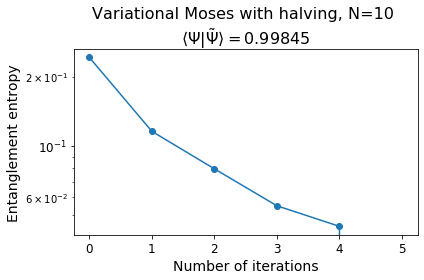

In [13]:
# No halving, no variational
plt.semilogy(info['Ss'], 'o-')
plt.ylabel("Entanglement entropy", fontsize=14)
plt.xlabel("Number of iterations", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Variational Moses with halving, N=10 \n" + rf"$\langle\Psi|\tilde\Psi\rangle = {round(mps_overlap(out, Psi),5)}$", fontsize=16)
plt.tight_layout()
plt.savefig("/space/ge38huj/state_approximation/img/full_halving_nv_N=10.png")
